In [1]:
import pandas as pd
import numpy as np

In [2]:
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

In [3]:
import matplotlib.pyplot as plt
from wordcloud import wordcloud
from termcolor import cprint
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('Airline-Sentiment.csv', header= 0,
                        encoding= 'unicode_escape')

In [9]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/2015 5:24,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,5.700000e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/2015 1:53,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,5.700000e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/2015 10:01,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,5.700000e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/2015 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,5.700000e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/2015 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,5.700000e+17,NaN,Pacific Time (US & Canada)


In [10]:
df.shape

(14640, 18)

In [11]:
positive = df[df['airline_sentiment'] == 'positive'].text
neutral  = df[df['airline_sentiment'] == 'neutral'].text
negative  = df[df['airline_sentiment'] == 'negative'].text

In [12]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [13]:
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [14]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [15]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
def remove_username(text):
    return re.sub('@[^\s]+','',text)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [16]:
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

In [17]:
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)
def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [18]:
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text']

In [19]:
from nltk.corpus import stopwords

In [20]:
import nltk

In [21]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [22]:
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [23]:
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [24]:
review_df = df[['text','final_text','airline_sentiment']]

print(review_df.shape)
review_df.head(10)

(14640, 3)


,text,final_text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,said,1
1,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky,2
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,1
3,@VirginAmerica it's really aggressive to blast...,bad flight really aggressive blast obnoxious e...,0
4,@VirginAmerica and it's a really big bad thing...,ca tell really big bad thing,0
5,@VirginAmerica seriously would pay $30 a fligh...,ca tell seriously would pay flight seats playi...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx ear worm go away,2
7,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity men without ha...,1
8,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D",well,2
9,"@VirginAmerica it was amazing, and arrived an ...",amazing arrived hour early good,2


In [25]:
X = df['final_text']
y = df['airline_sentiment']

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
X = df['final_text']
y = df['airline_sentiment']

In [28]:
tfidf = TfidfVectorizer()
X_final =  tfidf.fit_transform(X)

In [29]:
print(len(tfidf.vocabulary_))

10986


In [30]:
tfidf.vocabulary_

{'said': 8282,
 'plus': 7211,
 'added': 123,
 'commercials': 1864,
 'experience': 3310,
 'tacky': 9438,
 'today': 9777,
 'must': 6238,
 'mean': 5874,
 'need': 6314,
 'take': 9454,
 'another': 435,
 'trip': 9942,
 'bad': 768,
 'flight': 3605,
 'really': 7712,
 'aggressive': 204,
 'blast': 1048,
 'obnoxious': 6602,
 'entertainment': 3116,
 'guests': 4193,
 'faces': 3370,
 'amp': 381,
 'little': 5527,
 'recourse': 7768,
 'ca': 1354,
 'tell': 9540,
 'big': 986,
 'thing': 9649,
 'seriously': 8523,
 'would': 10833,
 'pay': 6982,
 'seats': 8444,
 'playing': 7179,
 'flying': 3665,
 'va': 10318,
 'yes': 10913,
 'nearly': 6310,
 'every': 3219,
 'time': 9736,
 'fly': 3656,
 'vx': 10464,
 'ear': 2931,
 'worm': 10807,
 'go': 4038,
 'away': 728,
 'missed': 6066,
 'prime': 7405,
 'opportunity': 6724,
 'men': 5930,
 'without': 10750,
 'hats': 4300,
 'parody': 6916,
 'well': 10601,
 'amazing': 343,
 'arrived': 572,
 'hour': 4538,
 'early': 2934,
 'good': 4064,
 'know': 5257,
 'suicide': 9290,
 'second'

In [31]:
from flask import Flask, render_template, Response

In [32]:
response = tfidf.fit_transform(X)

In [33]:
print(response)

  (0, 8282)	1.0
  (1, 9438)	0.5715144216199972
  (1, 3310)	0.3059111495163962
  (1, 1864)	0.4991825649009825
  (1, 123)	0.4357510390241188
  (1, 7211)	0.3751365529646431
  (2, 9942)	0.36395420765197306
  (2, 435)	0.34633875964424976
  (2, 9454)	0.34712077682710796
  (2, 6314)	0.29810885808388093
  (2, 5874)	0.45320923958874404
  (2, 6238)	0.48311623162963613
  (2, 9777)	0.31531756249018034
  (3, 7768)	0.34172941680948205
  (3, 5527)	0.24745102976128194
  (3, 381)	0.16193482755134644
  (3, 3370)	0.35747511722056036
  (3, 4193)	0.3488096329719864
  (3, 3116)	0.28478615899228715
  (3, 6602)	0.36864686945245756
  (3, 1048)	0.36864686945245756
  (3, 204)	0.35747511722056036
  (3, 7712)	0.19007094309233563
  (3, 3605)	0.07520299819101564
  (3, 768)	0.154383894408021
  :	:
  (14637, 241)	0.3646003960065555
  (14637, 7186)	0.28125266422116013
  (14638, 9288)	0.4309101166888255
  (14638, 1867)	0.4764689487768966
  (14638, 7088)	0.3944599855576322
  (14638, 5747)	0.2679196217307357
  (14638, 612

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [36]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2, stratify=y_sm)

In [37]:
num_cls = len(np.unique(y_sm))

In [38]:
from keras.models import Model
from keras.layers import Flatten, Input, Dense, Activation
from keras.losses import BinaryCrossentropy
import numpy as np
import tensorflow as tf

from keras.utils.np_utils import to_categorical

from keras.activations import softmax, relu, sigmoid

In [39]:
y_train = to_categorical(y_train, num_classes=num_cls)
y_test = to_categorical(y_test, num_classes=num_cls)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [40]:
sz = (X_train.shape[1])
num_h = 3000
I = Input(shape=(sz))
x = Dense(num_h)(I)
H = Activation("relu")(x)
x = Dense(num_cls)(H)
O = Activation("sigmoid")(x)
m1 = Model(inputs=I, outputs=H)
m1.compile(optimizer='rmsprop', loss=BinaryCrossentropy())
m2 = Model(inputs=I, outputs=O)
m2.compile(optimizer='rmsprop',loss=BinaryCrossentropy(), metrics=['accuracy'])
print(m2.compile)

<bound method Model.compile of <keras.engine.functional.Functional object at 0x7f990551cad0>>


In [41]:
def elm(m1, m2, x_train, y_train, x_test, y_test):
    w_model = m2.get_weights()
    w_model1 = m1.get_weights()
    H = m1.predict(x_train)
    print(H.shape)
    w_model[0] = w_model1[0]
    w_model[1] = w_model1[1]
    w_model[2] = tf.matmul(tf.linalg.pinv(H),y_train)
    m2.set_weights(w_model)
    _, acc = m2.evaluate(x_test, y_test)
    return(m2, acc)

In [42]:
m2, test_acc = elm(m1, m2, X_train, y_train, X_test, y_test)
print(test_acc)


689/689 [==============================] - 46s 66ms/step
(22027, 3000)
173/173 [==============================] - 13s 71ms/step - loss: 0.6540 - accuracy: 0.8466
0.8465589284896851


In [43]:
m2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10986)]           0         
                                                                 
 dense (Dense)               (None, 3000)              32961000  
                                                                 
 activation (Activation)     (None, 3000)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 9003      
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 32,970,003
Trainable params: 32,970,003
Non-trainable params: 0
_________________________________________________________________


In [44]:
y_obt = m2.predict(X_test)

173/173 [==============================] - 11s 65ms/step


In [45]:
def precision(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp)/(tp+fp)
    
def recall(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp)/(tp+fn)

def accuracy_f(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp+tn)/(tp+tn+fp+fn)
def tp_f(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return tp,fn,fp,tn

In [46]:
y_obt.shape

(5507, 3)

In [47]:
y_test.shape

(5507, 3)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
y_obt_c = np.argmax(y_obt,axis=1)
y_test_c = np.argmax(y_test,axis=1)
conf = confusion_matrix(y_test_c.ravel() ,y_obt_c.ravel())
print('confusion matrix')
print('________________\n')
print(conf)
print('_______________________________________________________\n')
print(classification_report(y_test_c.ravel() ,y_obt_c.ravel()))
print('_______________________________________________________\n')
print("label     tp     fn     fp     tn   accuracy   precision   recall")
for label in range(num_cls):
    tp,fn,fp,tn = tp_f(label, conf.astype(float))
    print(f"{label+1:5d} {tp:6.0f} {fn:6.0f} {fp:6.0f} {tn:6.0f}   {accuracy_f(label, conf):8.3f}   {precision(label, conf):9.3f}   {recall(label, conf):6.3f}")
    
print('_______________________________________________________\n')    
acc=np.sum(np.diagonal(conf))/np.sum(conf)
print('Accuracy : {}'.format(acc))

confusion matrix
________________

[[1714   88   34]
 [ 131 1451  254]
 [  55  283 1497]]
_______________________________________________________

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1836
           1       0.80      0.79      0.79      1836
           2       0.84      0.82      0.83      1835

    accuracy                           0.85      5507
   macro avg       0.85      0.85      0.85      5507
weighted avg       0.85      0.85      0.85      5507

_______________________________________________________

label     tp     fn     fp     tn   accuracy   precision   recall
    1   1714    122    186   3485      0.944       0.902    0.934
    2   1451    385    371   3300      0.863       0.796    0.790
    3   1497    338    288   3384      0.886       0.839    0.816
_______________________________________________________

Accuracy : 0.8465589250045397


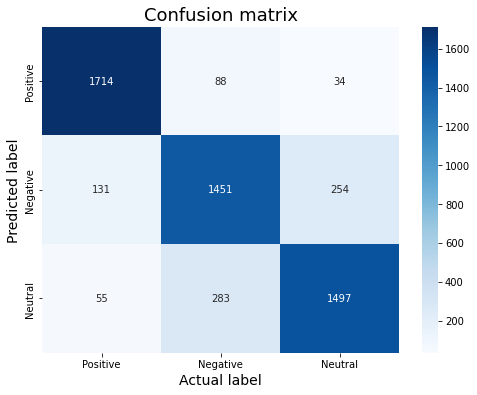

In [49]:
plt.figure(figsize=(8,6))
sentiment_classes = ['Positive', 'Negative', 'Neutral']
sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=18)
plt.xlabel('Actual label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.show()

In [50]:
conf_sensitivity = (tp / float(tp + fn))

In [51]:
    conf_specificity = (tn/ float(tn + fp))

In [52]:
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 

Sensitivity: 0.82
Specificity: 0.92
